# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

In [3]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 33.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=f38793da2ab1a9a663a20c0dd2162ef49442bc939755a948b7b44a7dc3b6d342
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [4]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [5]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [6]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [7]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [8]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [10]:
df = pd.read_csv('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/train.csv')
df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


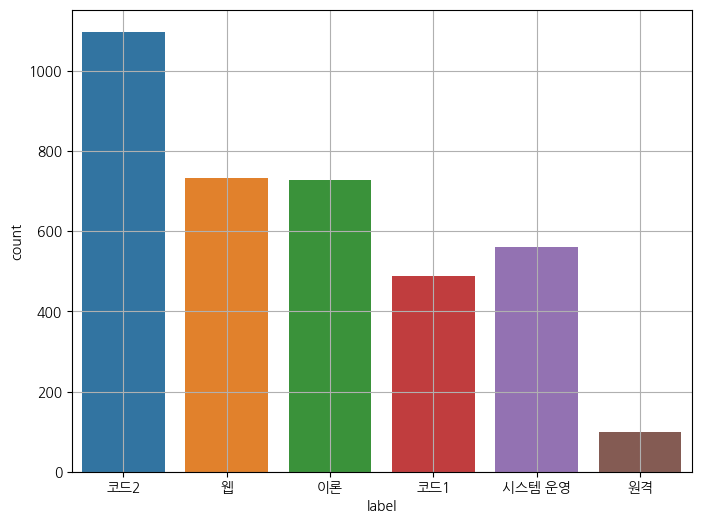

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x=df['label'])
plt.grid()
plt.show()

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [ ]:
df1 = df.copy()
def text_len(a):
  return len(a)

df1['text_len'] = df1['text'].apply(text_len)
df1.head()

,text,label,text_len
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,144
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,119
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,147
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,279
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,144


In [ ]:
max_len = df1['text_len'].argmax()
min_len = df1['text_len'].argmin()
print(f'min : {df1["text_len"][min_len]} \nmax : {df1["text_len"][max_len]} \n ')
print('==============================================')
print(f'min : {df1["text"][min_len]}')
print('==============================================')
print(f'max : {df1["text"][max_len]}')

min : 9 
max : 6012 
 
min : 원격 부탁드립니다
max : sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)
   1768             plot_kws["color"] = color
   1769 
-&gt; 1770         p.plot_u

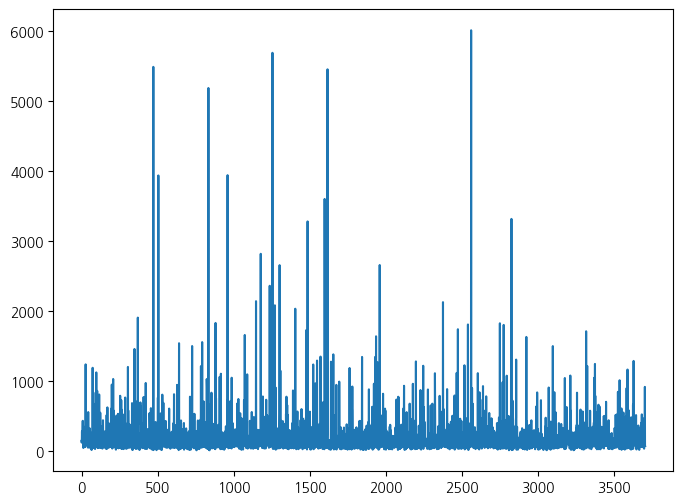

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df1['text_len'])
plt.show()

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [ ]:
from konlpy.tag import Kkma
from mecab import MeCab

import time

text = "나는 오늘도 konlpy와 MeCab을 활용하여 자연어 처리를 공부하고 있습니다."

start_time = time.time()
kkma = Kkma()
print("konlpy(Kkma)")
print("품사 태깅: ", kkma.pos(text))
print("명사 추출: ", kkma.nouns(text))
print("처리 시간: ", time.time() - start_time)

start_time = time.time()
m = MeCab()
print("MeCab")
print("품사 태깅: ", m.pos(text))
print("명사 추출: ", kkma.nouns(text))
print("처리 시간: ", time.time() - start_time)

konlpy(Kkma)
품사 태깅:  [('나', 'NP'), ('는', 'JX'), ('오늘', 'NNG'), ('도', 'JX'), ('konlpy', 'OL'), ('와', 'JC'), ('MeCab', 'OL'), ('을', 'JKO'), ('활용', 'NNG'), ('하', 'XSV'), ('여', 'ECS'), ('자연어', 'NNG'), ('처리', 'NNG'), ('를', 'JKO'), ('공부', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), ('있', 'VXV'), ('습니다', 'EFN'), ('.', 'SF')]
명사 추출:  ['나', '오늘', '활용', '자연어', '처리', '공부']
처리 시간:  9.359030723571777
MeCab
품사 태깅:  [('나', 'NP'), ('는', 'JX'), ('오늘', 'NNG'), ('도', 'JX'), ('konlpy', 'SL'), ('와', 'JC'), ('MeCab', 'SL'), ('을', 'JKO'), ('활용', 'NNG'), ('하', 'XSV'), ('여', 'EC'), ('자연어', 'NNG'), ('처리', 'NNG'), ('를', 'JKO'), ('공부', 'NNG'), ('하', 'XSV'), ('고', 'EC'), ('있', 'VX'), ('습니다', 'EF'), ('.', 'SF')]
명사 추출:  ['나', '오늘', '활용', '자연어', '처리', '공부']
처리 시간:  0.08346152305603027


In [11]:
df1 = df.copy()
from mecab import MeCab

m = MeCab()

def pos_tag(text):
  return m.pos(text)

def nouns_tag(text):
  return m.nouns(text)

df1['pos_tag'] = df1['text'].apply(pos_tag)
df1['nouns_tag'] = df1['text'].apply(nouns_tag)

df1.head()

,text,label,pos_tag,nouns_tag
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,"[(self, SL), (., SY), (convs, SL), (1, SN), (=...","[여기, 커널, 사이즈, 은, 단어, 최대, 길이, 가정, 선언, 것]"
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,"[(현재, MAG), (이미지, NNG), (를, JKO), (여러, MM), (개...","[이미지, 개, 업로드, 자바, 스크립트, 동적, 폼, 개, 생성, 데, 클릭, 뭘..."
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,"[(glob, SL), (., SY), (glob, SL), ((, SSO), (P...","[사용, 때, 질문, 포함, 작동, 것, 질문, 제공, 파일, 폴더, 포함, 폴더,..."
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,"[(tmpp, SL), (=, SY), (tmp, SL), (., SY), (gro...","[오류, 해결]"
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,"[(filename, SL), (=, SY), (TEST, SL), (_, SY),...","[안, 폴더, 안, 이미지, 저장, 걸로, 이해, 실행, 폴더, 이미지, 저장, 질문]"


In [ ]:
# Number of Samples / Number of words per sample
# 주로 1500보다 작으면 ngram / 크면 sequence 방식 사용

n = 0
for i in df1['pos_tag']:
  n += len(i)

len(df1) / (n/len(df1))

46.16679215855003

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
df2 = df.copy()

In [ ]:
# !pip install nltk

In [ ]:
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import *
import matplotlib.pyplot as pl

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# 데이터프레임 text열을 선택하여 문장들의 리스트로 만들기
sentences = df2['text'].tolist()

# 명사 추출
nouns_list = []
for sentence in sentences:
  words = word_tokenize(sentence)
  for word, pos in nltk.pos_tag(words):
    if pos in ['NN', 'NNS','NNP','NNPS']:
      nouns_list.append(word.lower())

# 품사 태깅
tagged_words = nltk.pos_tag(nltk.word_tokenize(' '.join(sentences)))

In [ ]:
# nltk.Text 객체로 변환
nltk_text = nltk.Text(tagged_words)
nltk_text

<Text: ('self.convs1', 'NN') ('=', 'NNS') ('nn.ModuleList', 'VBP') ('(', '(') ('[', 'JJ') ('nn.Conv2d', 'NN') ('(', '(') ('1', 'CD')...>

In [ ]:
# nltk.text 객체의 통계 정보를 계산

# 토큰 개수
token_count = len(nltk_text.tokens)

# Type-Token Ratio
ttr = len(set(nltk_text.tokens)) / token_count

print('Token count:', token_count)
print('Type-Token Ratio:', ttr) # 낮을 수록 단어가 집중되어 있다.

Token count: 182606
Type-Token Ratio: 0.22282400359243398


[(']', 2282), ('[', 1905), ('=', 1625), ('수', 683), ('print', 620), ('*', 620), ('..', 545), ('gt', 520), ('어떻게', 435), ('%', 425)]


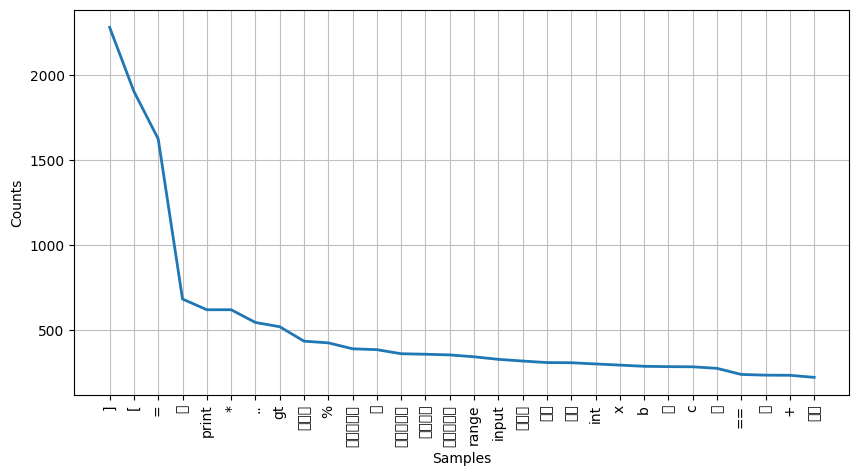

In [ ]:
# 각 단어의 빈도수를 계산하고 분포를 시각화

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in nouns_list if word not in stop_words]

# 빈도 분포
fdist = FreqDist(filtered_words)
print(fdist.most_common(10))

# 상위 30개 단어 시각화
plt.figure(figsize=(10,5))
fdist.plot(30)

In [ ]:
# 코드
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_words)
finder.apply_word_filter(lambda w: len(w) < 3)
finder.apply_freq_filter(5)
print('Code Collocations:', finder.nbest(bigram_measures.raw_freq, 10))

# 웹
finder = BigramCollocationFinder.from_words(filtered_words)
finder.apply_word_filter(lambda w: len(w) < 3)
finder.apply_ngram_filter(lambda w1, w2: 'web' not in (w1, w2))
finder.apply_freq_filter(5)
print('Web Collocations:', finder.nbest(bigram_measures.raw_freq, 10))

# 이론
finder = BigramCollocationFinder.from_words(filtered_words)
print('Collocations:', finder.nbest(bigram_measures.raw_freq, 10))

# 이론
finder = BigramCollocationFinder.from_words(filtered_words)
finder.apply_word_filter(lambda w: len(w) < 3)
print('Collocations:', finder.nbest(bigram_measures.raw_freq, 10))

Code Collocations: [('int', 'input'), ('input', '.split'), ('traceback', 'call'), ('map', 'int'), ('오류가', '뜹니다'), ('방법이', '있을까요'), ('list', 'int'), ('부탁드립니다', '감사합니다'), ('궁금합니다', '감사합니다'), ('import', 'sys')]
Web Collocations: []
Collocations: [('[', ']'), ('*', '*'), ('=', '['), ('수', '있을까요'), (']', '['), (']', '='), (']', ']'), ('int', 'input'), ('[', '['), ('수', '있는')]
Collocations: [('int', 'input'), ('input', '.split'), ('traceback', 'call'), ('map', 'int'), ('오류가', '뜹니다'), ('방법이', '있을까요'), ('list', 'int'), ('부탁드립니다', '감사합니다'), ('궁금합니다', '감사합니다'), ('import', 'sys')]


In [ ]:
df2['text_len'] = df2['text'].apply(len)

In [ ]:
df2[df2['text_len'] == df2['text_len'].min()]['text'].iloc[0]

'원격 부탁드립니다'

In [ ]:
# 문장 입력 받기
sentence = df2[df2['text_len'] == df2['text_len'].min()]['text'].iloc[0]

# 토큰화
tokens = nltk.word_tokenize(sentence)

# 품사 부착
tagged = nltk.pos_tag(tokens)

# 구문 분석
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
parser = nltk.RegexpParser(grammar)
parsed = parser.parse(tagged)

# 결과 출력
print(parsed)

# 문장구조 (Sentence Structure) / 명사구 (Noun Phrase) / 명사 (Noun)

(S (NP 원격/NN 부탁드립니다/NN))


In [ ]:
from nltk.tree import Tree

tree = Tree.fromstring(str(parsed))
tree.pretty_print()

       S           
       |            
       NP          
   ____|______      
원격/NN     부탁드립니다/NN



### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!aot-get update -qq

/bin/bash: aot-get: command not found


In [ ]:
!apt-get install fonts-nanum* -qq

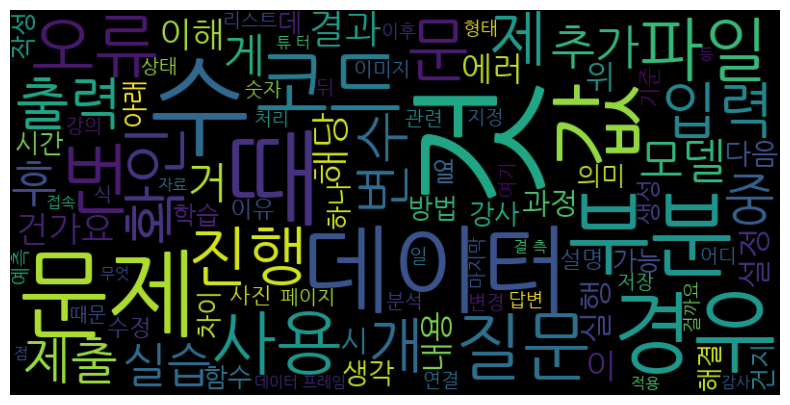

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nouns_list = df1['nouns_tag'].tolist()

text = ''
for i in nouns_list:
  text += ' '.join(i)

wordcloud = WordCloud(max_font_size=150, max_words=100,
                      background_color='black', relative_scaling=0.8,
                      width=800, height=400, font_path=FONT_PATH).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
for label in sorted(train_df.label.unique()):
    text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [11]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

df['label'] = df['label'].map(label_dict)

### 5-2. Train Validation split

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [12]:
def re(text):
  import re
  return re.sub('[^a-zA-Z0-9\n\.]',' ',text)

df['text'] = df['text'].apply(re)

In [13]:
df

,text,label
0,self.convs1 nn.ModuleList nn.Conv2d 1 Co ...,0
1,...,1
2,glob.glob PATH .\n\nPATH ...,0
3,tmpp tmp.groupby by Addr1 as index Fals...,0
4,filename TEST IMAGE str round frame sec ...,0
...,...,...
3701,train val train set val set ...,0
3702,\n ...,3
3703,cacoo packet tracer \n\n1. IT ...,2
3704,inplace True none . ...,4


### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(df['text'])
X = X.toarray()

print(vectorizer.vocabulary_)
print(X)
print(df['label'])

{'self convs1': 16402, 'convs1 nn': 5447, 'nn modulelist': 13100, 'modulelist nn': 12666, 'nn conv2d': 13098, 'conv2d co': 5430, 'co 100': 5061, '100 for': 366, 'for in': 8184, 'in ks': 9933, 'ks 100': 11061, '100 100': 335, 'glob glob': 8574, 'glob path': 8579, 'path path': 14198, 'path aivle': 14161, 'aivle 3rd': 3347, '3rd team': 1964, 'team glob': 17929, 'tmpp tmp': 18443, 'tmp groupby': 18415, 'groupby by': 8701, 'by addr1': 4588, 'addr1 as': 3192, 'as index': 3902, 'index false': 10095, 'false category': 7691, 'category sum': 4742, 'sum plt': 17665, 'plt figure': 14421, 'figure figsize': 7890, 'figsize 15': 7885, '15 plt': 828, 'plt bar': 14419, 'bar tmpp': 4205, 'tmpp addr1': 18441, 'addr1 tmpp': 3193, 'tmpp category': 18442, 'category 1000': 4738, '1000 plt': 422, 'plt ticklabel': 14437, 'ticklabel format': 18320, 'format axis': 8247, 'axis style': 4132, 'style plain': 17583, 'plain plt': 14393, 'plt show': 14433, 'show unsupported': 16846, 'unsupported operand': 19074, 'operan

In [37]:
len(X[0])

20432

In [14]:
a = []
for i in df1['nouns_tag']:
  a.append(' '.join(i))

df1['nouns_tag'] = a

In [19]:
df1

,text,label,pos_tag,nouns_tag
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,"[(self, SL), (., SY), (convs, SL), (1, SN), (=...",여기 커널 사이즈 은 단어 최대 길이 가정 선언 것
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,"[(현재, MAG), (이미지, NNG), (를, JKO), (여러, MM), (개...",이미지 개 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 ...
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,"[(glob, SL), (., SY), (glob, SL), ((, SSO), (P...",사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함 폴더 안 정상 작동
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,"[(tmpp, SL), (=, SY), (tmp, SL), (., SY), (gro...",오류 해결
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,"[(filename, SL), (=, SY), (TEST, SL), (_, SY),...",안 폴더 안 이미지 저장 걸로 이해 실행 폴더 이미지 저장 질문
...,...,...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2,"[(토큰, NNG), (화, XSN), (이후, NNG), (train, SL), ...",토큰 이후 분리 벡터 진행 데이터 전 번 벡터 진행 상관 머신 러닝 스케일 적용 때...
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영,"[(올린, VV+ETM), (값, NNG), (들, XSN), (중, NNB), (...",값 중 최고점 건가요 최근 파일 갱신 최고점 값 경우 변경 것
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론,"[(수업, NNG), (에서, JKB), (cacoo, SL), (랑, JC), (...",수업 이유 인프라 구조 이해 시간 인프라 구축 설계 구성 비유 일지 운전 게 목표 ...
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격,"[(inplace, SL), (=, SY), (True, SL), (해도, VV+E...",값 변경 원격 지원 가능


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))
X_1 = vectorizer.fit_transform(df1['nouns_tag'])
X_1 = X_1.toarray()

print(vectorizer.vocabulary_)
print(X_1)

{'여기 커널': 14043, '커널 사이즈': 21622, '사이즈 단어': 9861, '단어 최대': 4446, '최대 길이': 21001, '길이 가정': 3697, '가정 선언': 224, '이미지 업로드': 16052, '업로드 자바': 13767, '자바 스크립트': 17361, '스크립트 동적': 12044, '동적 생성': 5339, '생성 클릭': 10560, '클릭 기본': 22274, '기본 예제': 3455, '예제 코드': 14532, '코드 이유': 21965, '이유 뭘까요': 16317, '사용 질문': 9766, '질문 포함': 20372, '포함 작동': 23494, '작동 질문': 17482, '질문 제공': 20328, '제공 파일': 18871, '파일 폴더': 23090, '폴더 포함': 23537, '포함 폴더': 23503, '폴더 정상': 23533, '정상 작동': 18587, '오류 해결': 14808, '폴더 이미지': 23528, '이미지 저장': 16060, '저장 걸로': 17750, '걸로 이해': 1264, '이해 실행': 16546, '실행 폴더': 13062, '저장 질문': 17809, '헬스 정신': 24731, '정신 건강': 18629, '건강 관심': 1072, '관심 디지털': 2622, '디지털 치료제': 5461, '치료제 관련': 21523, '관련 서비스': 2530, '서비스 기획': 10677, '기획 기업': 3692, '기업 프로젝트': 3514, '프로젝트 희망': 23824, '희망 보건복지부': 25478, '보건복지부 정신': 8607, '건강 관련': 1071, '관련 포털': 2584, '포털 운영': 23461, '운영 중심': 15289, '중심 문제': 19604, '문제 정의': 7265, '파일 페이지': 23086, '페이지 안사': 23271, '안사 인프라': 13486, '인프라 구성': 16892, '구성 서버': 2939, '서버 솔루션': 1

In [24]:
len(X_1[0])

25501

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

최소 문장 길이: 0
최대 문장 길이: 805
평균 문장 길이: 16.92849433351322


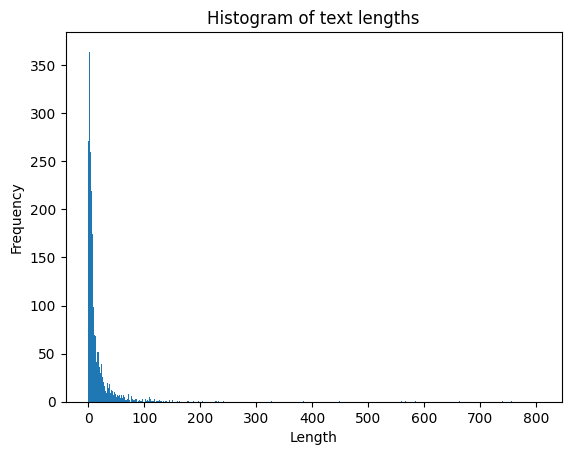

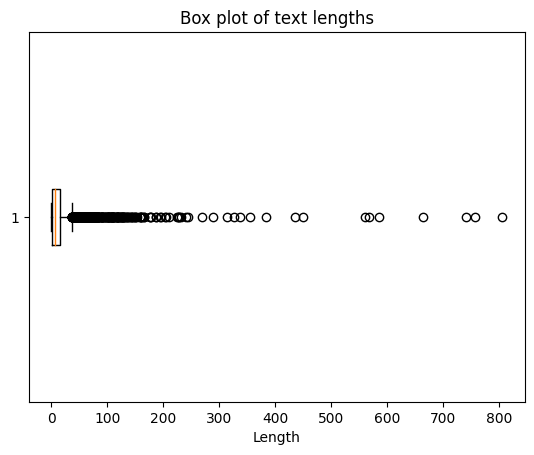

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

# tokenizer 객체 생성 후 단어 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

# 문장 길이 분포 확인
text_lengths = [len(t.split()) for t in df['text']]
print("최소 문장 길이:", min(text_lengths))
print("최대 문장 길이:", max(text_lengths))
print("평균 문장 길이:", sum(text_lengths) / len(text_lengths))

# 문장 길이 시각화
plt.hist(text_lengths, bins=range(min(text_lengths), max(text_lengths)+2, 1))
plt.title("Histogram of text lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# 문장 길이 Box plot
plt.boxplot(text_lengths, vert=False)
plt.title("Box plot of text lengths")
plt.xlabel("Length")
plt.show()

# 정수 시퀀스로 변환
max_len = max(text_lengths)
X2 = tokenizer.texts_to_sequences(df['text'])
X2 = pad_sequences(X2, maxlen=max_len)
y = df['label']

In [16]:
len(X2[0])

805

In [32]:
a=0

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer 객체 생성 후 단어 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1['nouns_tag'])

# 정수 시퀀스로 변환
a=0
for i in df1['nouns_tag']:
  if a <= len(i):
    a=len(i)
max_len = a

X_2 = tokenizer.texts_to_sequences(df1['nouns_tag'])
X_2 = pad_sequences(X_2, maxlen=max_len)

In [37]:
len(X_2[0])

613

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

네, 맞습니다. ngram을 이용한 CountVectorizer, Sequence, 그리고 word2vec는 모두 단어를 벡터화하는 방법 중에 하나입니다. CountVectorizer와 Sequence는 각각 단어를 고정된 길이의 벡터로 변환합니다. 반면 word2vec은 단어를 고정된 길이의 벡터가 아니라, 분포 가설(Distributional Hypothesis)을 기반으로 벡터화합니다. 이 분포 가설이란, 단어의 의미는 그 주변에 등장하는 단어들과 밀접하게 관련이 있으며, 이를 통해 단어를 벡터화할 수 있다는 가설입니다.

In [17]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [44]:
import nltk
from gensim.models import Word2Vec

# 텍스트 데이터를 토큰화합니다.
nltk.download('punkt')
df['tokenized_text'] = df['text'].apply(nltk.word_tokenize)

# Word2Vec 모델을 학습합니다.
model = Word2Vec(df['tokenized_text'], vector_size=100, window=5, min_count=1)

# 문장 임베딩을 생성합니다.
sent_embedding_vectors = get_dataset(df['tokenized_text'], model, 100)

# 생성된 문장 임베딩을 DataFrame에 추가합니다.
for i in range(100):
    df[f'embedding_{i}'] = sent_embedding_vectors[:, i]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
sent_embedding_vectors.shape

(3706, 100)

In [ ]:
import nltk
from gensim.models import Word2Vec

# 텍스트 데이터를 토큰화합니다.
nltk.download('punkt')
df['tokenized_text'] = df1['text'].apply(nltk.word_tokenize)

# Word2Vec 모델을 학습합니다.
model = Word2Vec(df['tokenized_text'], vector_size=100, window=5, min_count=1)

# 문장 임베딩을 생성합니다.
sent_embedding_vectors = get_dataset(df['tokenized_text'], model, 100)

# 생성된 문장 임베딩을 DataFrame에 추가합니다.
for i in range(100):
    df[f'embedding_{i}'] = sent_embedding_vectors[:, i]


### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [42]:
np.save('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/X_N.npy', X)

In [38]:
np.save('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/X_S.npy', X_2)

In [46]:
np.save('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/X_E.npy', sent_embedding_vectors)